<a href="https://colab.research.google.com/gist/demirmerv/0a60d9a4bc291496b0442482a6c8f828/mervedemir_telcochurndataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EDA for Telco Churn Dataset**       
Churn is the measure of how many customers stop using a product. This can be measured based on actual usage or failure to renew (when the product is sold using a subscription model). Often evaluated for a specific period of time, there can be a monthly, quarterly, or annual churn rate.

**customerID:** Customer ID

**gender:** gender (female, male)

**SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)

**PartnerWhether:**  the customer has a partner or not (Yes, No)

**Dependents:** Whether the customer has dependents or not (Yes, No)

**tenure:** Number of months the customer has stayed with the company


**PhoneService:** Whether the customer has a phone service or not (Yes, No)
**MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)

**InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)

**OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)

**OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)

**DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)

**StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)

**Contract:** The contract term of the customer (Month-to-month, One year, Two year)

**PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)

**PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges:** The amount charged to the customer monthly

**TotalCharges:** The total amount charged to the customer

**Churn:** Whether the customer churned or not (Yes or No)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly.graph_objects as go
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import scipy.stats as ss

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [38]:
#Let's examine the first 5 lines. 

df = pd.read_csv("TelcoCustomer.csv", delimiter=',', skiprows=0, low_memory=False)
df.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [39]:
# Let's examine the last 5 lines. 

df.tail()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[5 rows x 21 columns]

In [40]:
#  Let's examine shape of data. 

df.shape

(7043, 21)

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
#  Let's examine information of data. 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
#Let's convert the total charge to a numeric value.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')
print(df.isnull().any())
print("\n# of Null values in 'TotalCharges`: ",df["TotalCharges"].isnull().sum())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
tenure_bin          False
dtype: bool

# of Null values in 'TotalCharges`:  11


In [74]:
#Let's fill the missing values ​​with the mean
df= df.fillna(df.mean())

In [75]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')
print(df.isnull().any())
print("\n# of Null values in 'TotalCharges`: ",df["TotalCharges"].isnull().sum())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
tenure_bin          False
dtype: bool

# of Null values in 'TotalCharges`:  0



## **Data Visualization**

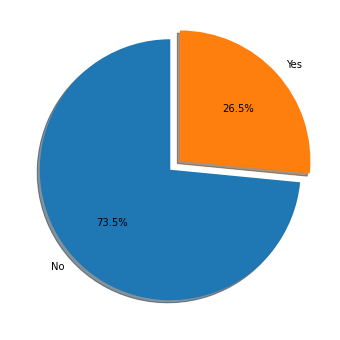

In [88]:

plt.figure(figsize=(8,6))
sizes = df.Churn.value_counts()
labels = ["No", "Yes"]
explode = (0, 0.1,)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show() 


 The figure shows us that 26.5% of customers churn. The remaining 83.5% are still subscriptions.

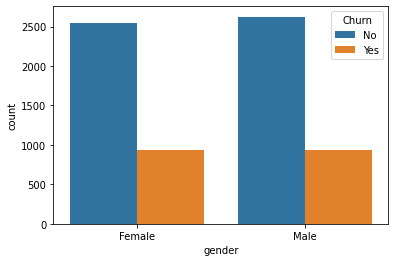

In [45]:
sns.countplot(x='gender', hue='Churn', data=df);

It has been observed whether churn is related to gender. Gender has no significant effect on quitting.

In [46]:
cat_feature = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
    'tenure_bin']

In [47]:
df['tenure_bin'] = pd.cut(df.tenure,pd.IntervalIndex.from_tuples([(-1,6),(6,12),(12,18),(18,24),(24,30),(30,36),
                                                                 (36,42),(42,48),(48,54),(54,60),(60,66),(66,72)]))

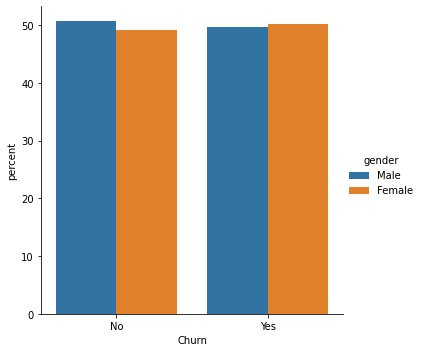

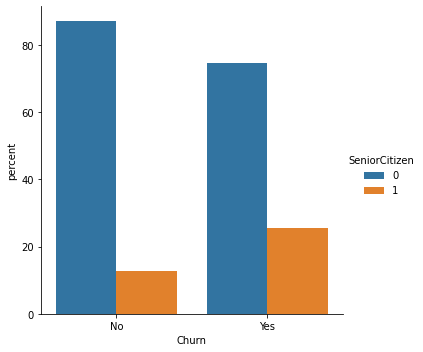

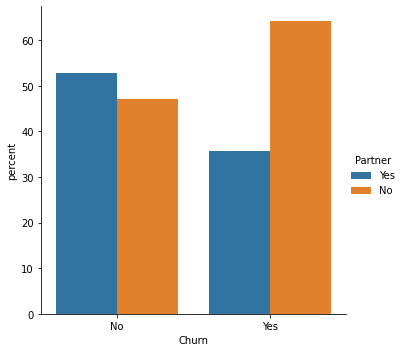

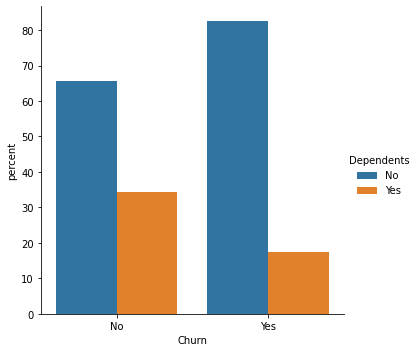

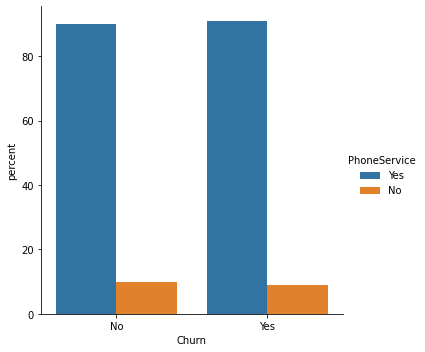

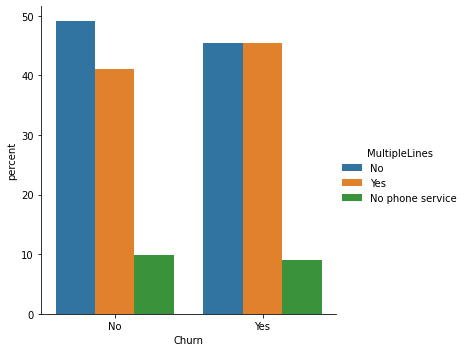

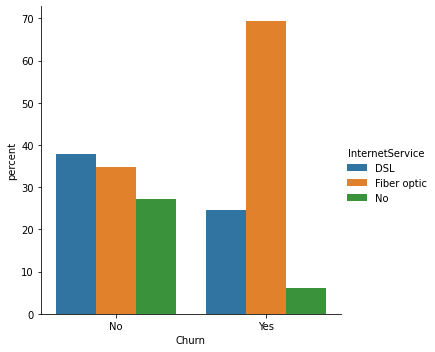

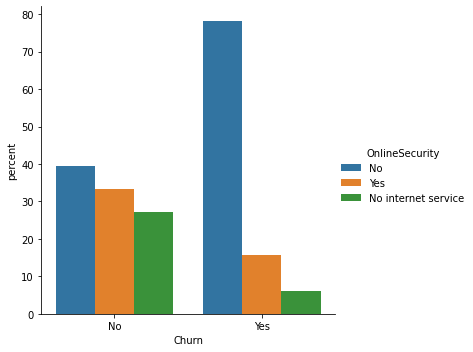

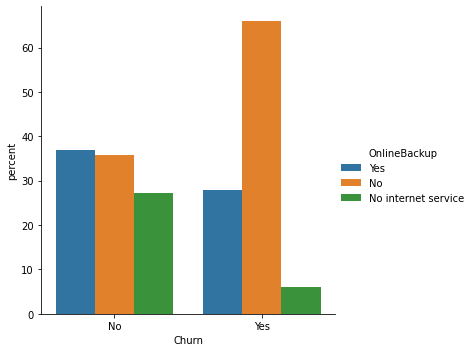

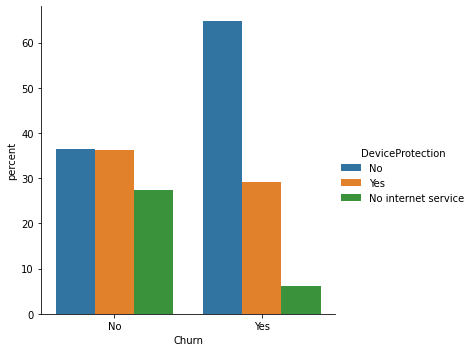

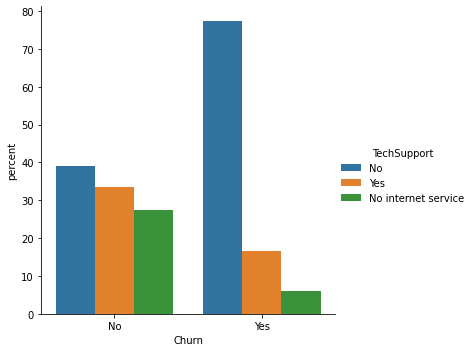

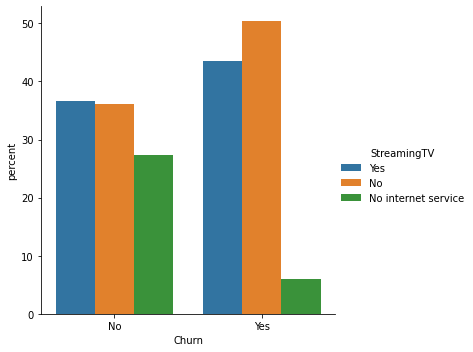

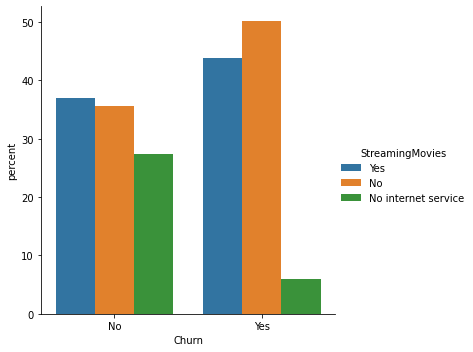

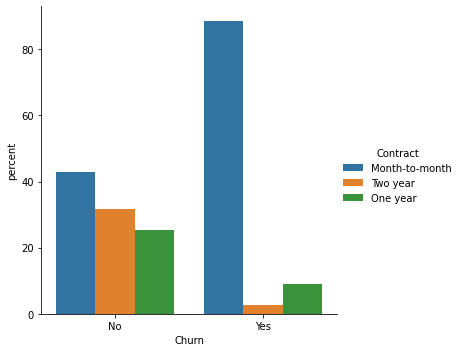

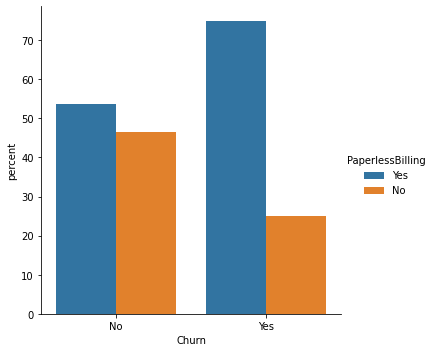

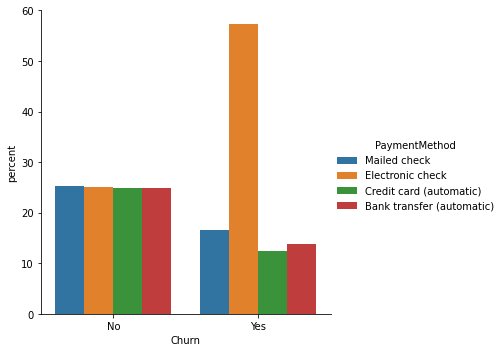

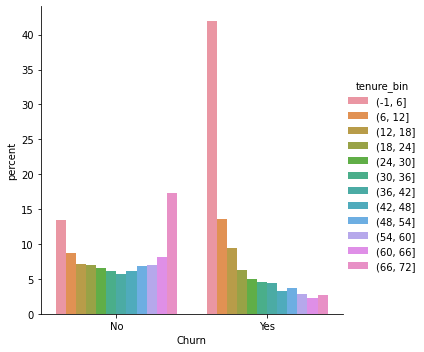

In [48]:
for col in cat_feature:
    x,y = 'Churn', col

    (df
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

    plt.show()

## Interpretation 

1.Single/no-partner customer dominates the churn customer set, reversely where customers with Partner dominates the non-churn customer set.

2.Customers that used Fiber optic as InternetService dominates (~70%) the churn customers, whereas it is not the case in non-churn customers i.e. more uniformly distributed; ~35% Fiber optic in non-churn customers.

3.~80% of churn customers did not use OnlineSecurity on their InternetService. Additionaly, ~65% churn customers did not use OnlineBackup, ~63% did not use DeviceProtection, ~80% of churn customers did not use TechSupport.

4.~85% of churn customers used Month-to-month contract. ~60% of churn customers used Electronic check as PaymentMethod, whereas it is not the case in non-churn customers i.e. more uniformly distributed; ~25% 

5.Electronic check in non-churn customers ~42% of churn customers have tenure less than 6 months.

6.Non senior citizens are less likely to churn propprtionally to senior citizens. Contracts without paperless billing are less likely to churn than paperless billing  

In [49]:
columns_5 = []

for column in df.columns:
     
    if df[column].nunique() <=5 and column!="Churn":
        
        columns_5.append(column)
        

Text(0.5, 1.0, 'Churn based on tenure')

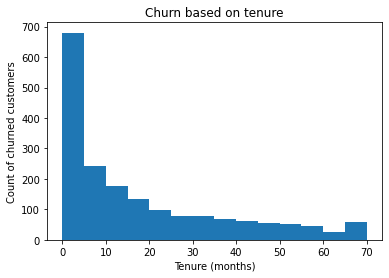

In [50]:
filt = df['Churn']=='Yes'
bins = np.arange(0,75, 5)

plt.hist(df[filt]['tenure'], bins = bins)
plt.xlabel('Tenure (months)')
plt.ylabel('Count of churned customers')
plt.title('Churn based on tenure')

Text(0.5, 1.0, 'Distribution of Monthly Charges')

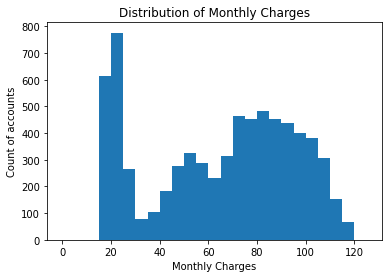

In [52]:
bins = np.arange(0,130, 5)

plt.hist(df['MonthlyCharges'], bins = bins)
plt.xlabel('Monthly Charges')
plt.ylabel('Count of accounts')
plt.title('Distribution of Monthly Charges')

The monthly payment distributions of the customers were examined. The most common monthly charges are 15 - 25 and 70 - 90 per month

Text(0.5, 1.0, 'Distribution of Monthly Charges for Churned customers')

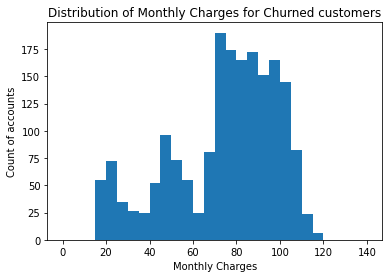

In [53]:
filt = df['Churn']=='Yes'
bins = np.arange(0,145, 5)

plt.hist(df[filt]['MonthlyCharges'], bins = bins)
plt.xlabel('Monthly Charges')
plt.ylabel('Count of accounts')
plt.title('Distribution of Monthly Charges for Churned customers')

The relationship between those who gave up and their payment amounts was examined. Most churn customer's are payers between 65-105. 

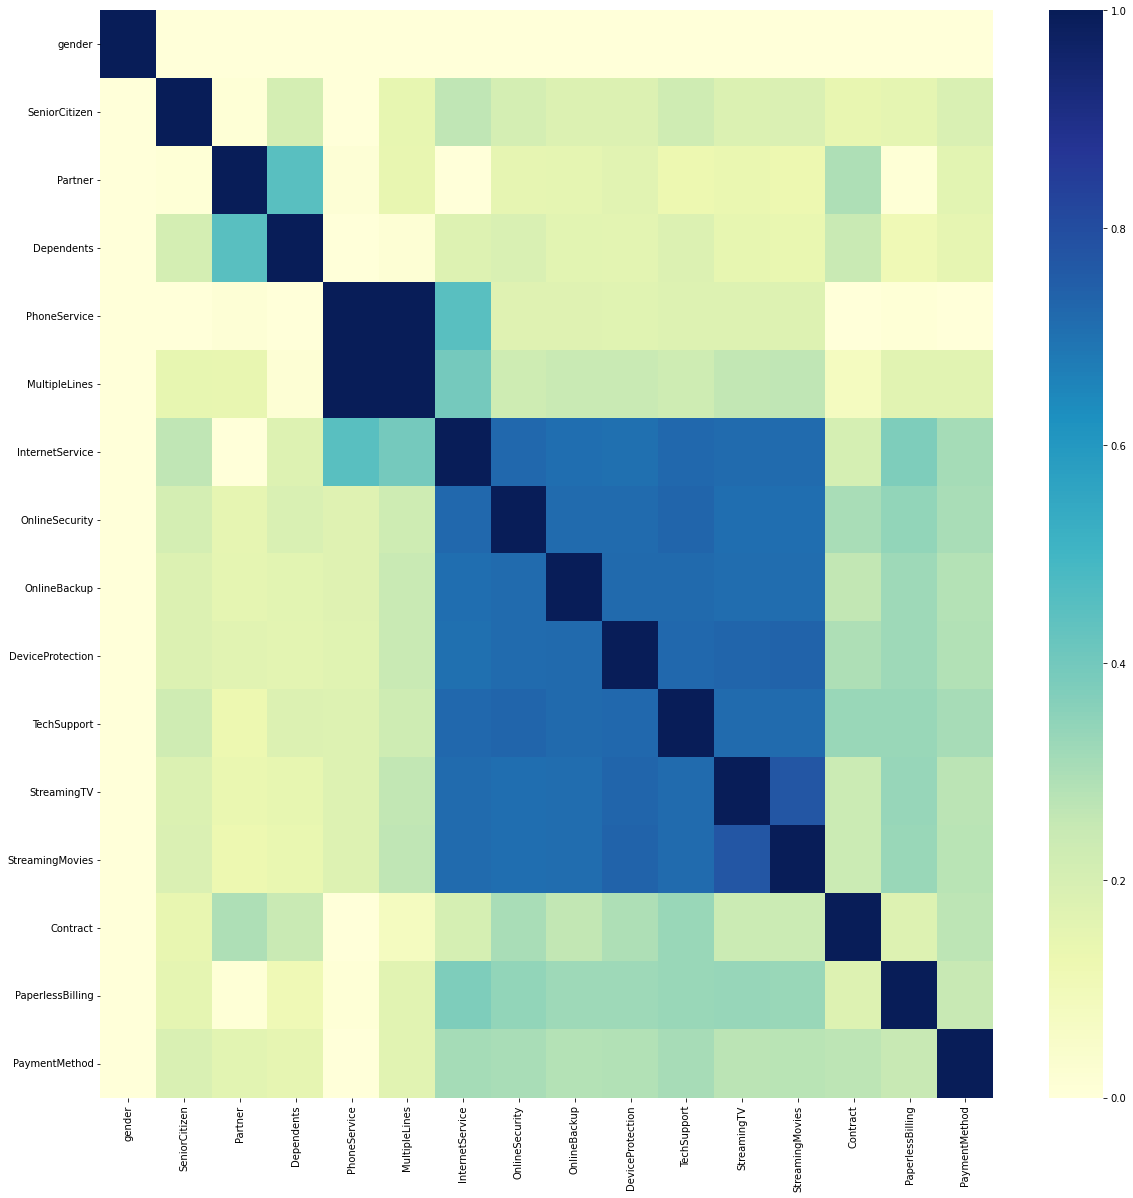

In [54]:
df_corr = df[columns_5]

# Cramers V for categorical correlations
def cramers_v(x, y):
    x = np.array(x)
    y = np.array(y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramersv = pd.DataFrame(index=df_corr.columns,columns=df_corr.columns)
columns = df_corr.columns

for i in range(0,len(columns)):
    for j in range(0,len(columns)):
        #print(data[columns[i]].tolist())
        u = cramers_v(df_corr[columns[i]].tolist(),df_corr[columns[j]].tolist())
        cramersv.loc[columns[i],columns[j]] = u
        
cramersv.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(cramersv,cmap="YlGnBu")
plt.show()

Apart from the expected correlation between partners and dependants, there is a strong correlation between the phone service and presence of multiple lines (or multiple phone numbers for the same customer). My guess is that a good service prompts customers to order multiple lines
Also users of internet security avail other internet based features


In [91]:
numericData= df.select_dtypes(include=[np.number])
categoricData=df.select_dtypes(exclude=[np.number])
print(f"Numerical: {numericData.shape[1]} -- Categorical: {categoricData.shape[1]}")

Numerical: 3 -- Categorical: 19


In [92]:
corr=numericData.corr()

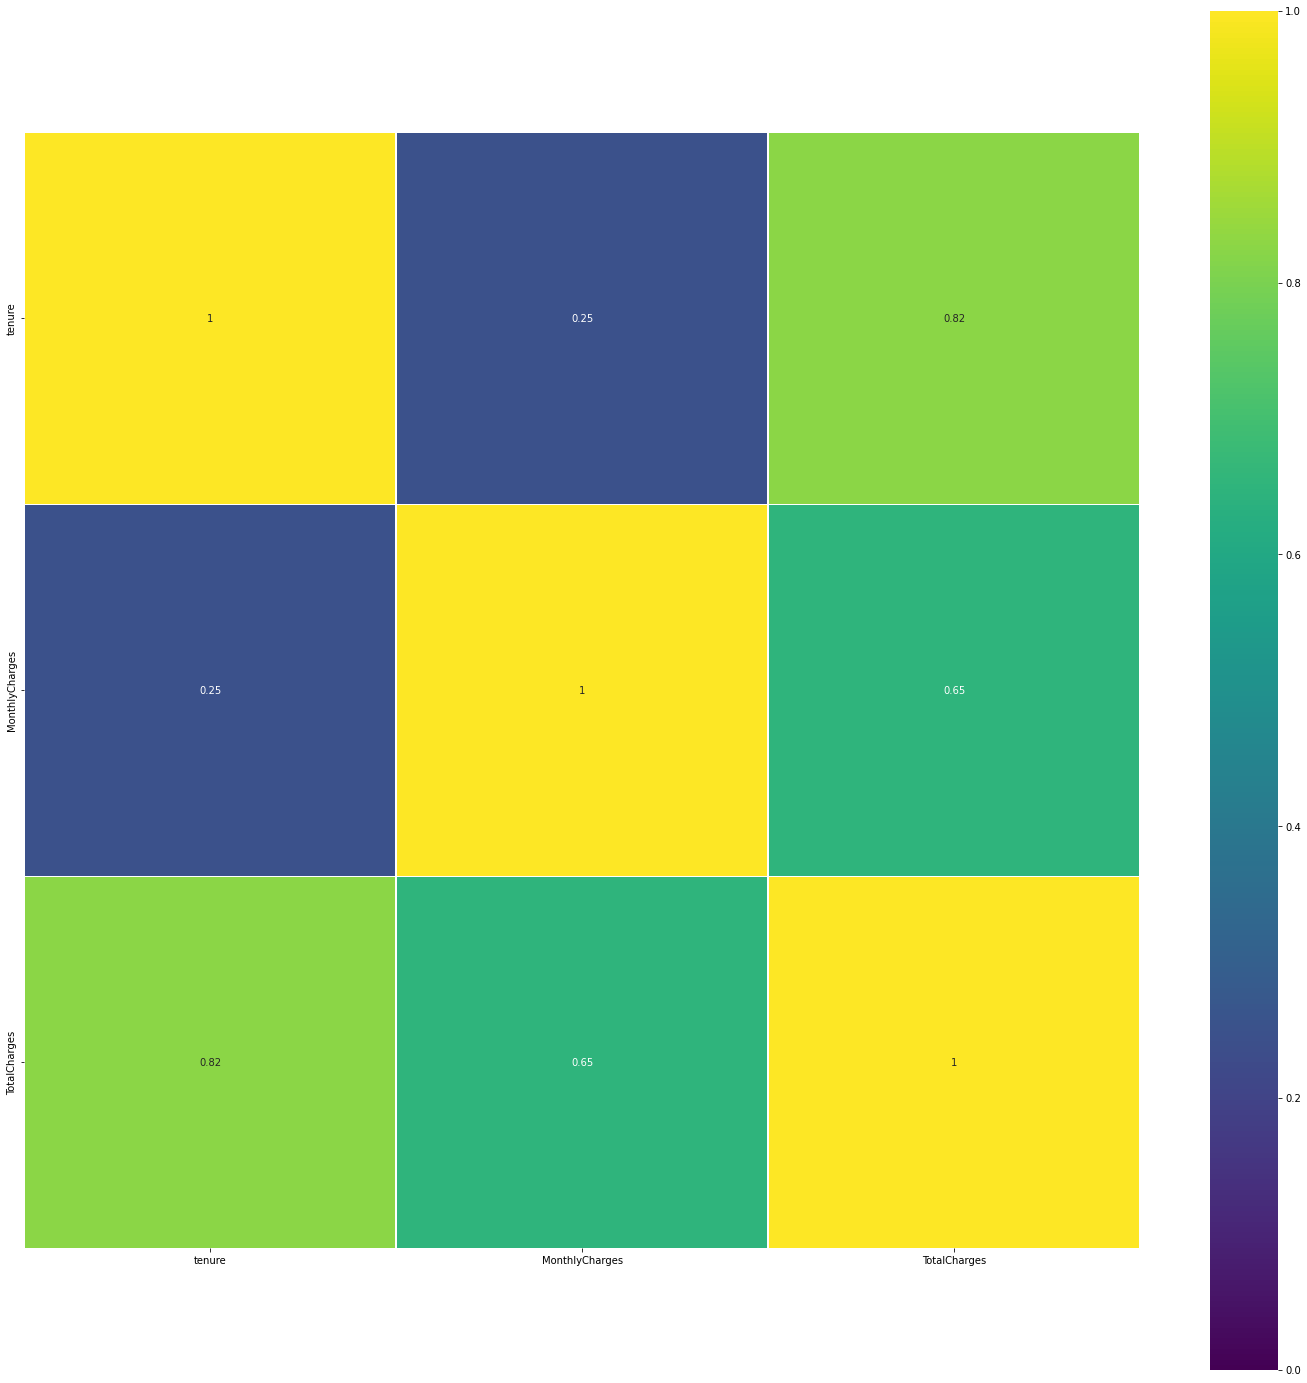

In [93]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')